# Getting data from NOAA webpage

In [1]:
!wget -O land_global_temperature_anomaly-1880-2015.csv https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/all/1/1880-2015.csv

--2017-01-04 13:27:28--  https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/all/1/1880-2015.csv
Resolviendo www.ncdc.noaa.gov (www.ncdc.noaa.gov)... 205.167.25.172, 205.167.25.171, 2610:20:8040:2::171, ...
Conectando con www.ncdc.noaa.gov (www.ncdc.noaa.gov)[205.167.25.172]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: no especificado [text/plain]
Grabando a: “land_global_temperature_anomaly-1880-2015.csv”

    [  <=>                                  ] 23.796      67,7KB/s   en 0,3s   

2017-01-04 13:27:29 (67,7 KB/s) - “land_global_temperature_anomaly-1880-2015.csv” guardado [23796]



In [2]:
import numpy as np

In [3]:
!head land_global_temperature_anomaly-1880-2015.csv

Global Land Temperature Anomalies
Units: Degrees Celsius
Base Period: 1901-2000
Year,Value
188001,-0.1538
188002,-0.5771
188003,-0.7250
188004,-0.2990
188005,-0.2098
188006,-0.3002


In [7]:
Temp_data = np.loadtxt(fname='land_global_temperature_anomaly-1880-2015.csv', delimiter=',', skiprows=4)
Temp_data

array([[  1.88001000e+05,  -1.53800000e-01],
       [  1.88002000e+05,  -5.77100000e-01],
       [  1.88003000e+05,  -7.25000000e-01],
       ..., 
       [  2.01510000e+05,   1.32120000e+00],
       [  2.01511000e+05,   1.28280000e+00],
       [  2.01512000e+05,   1.87220000e+00]])

In [8]:
np.shape(Temp_data)

(1632, 2)

In [10]:
from matplotlib import pyplot
%matplotlib inline

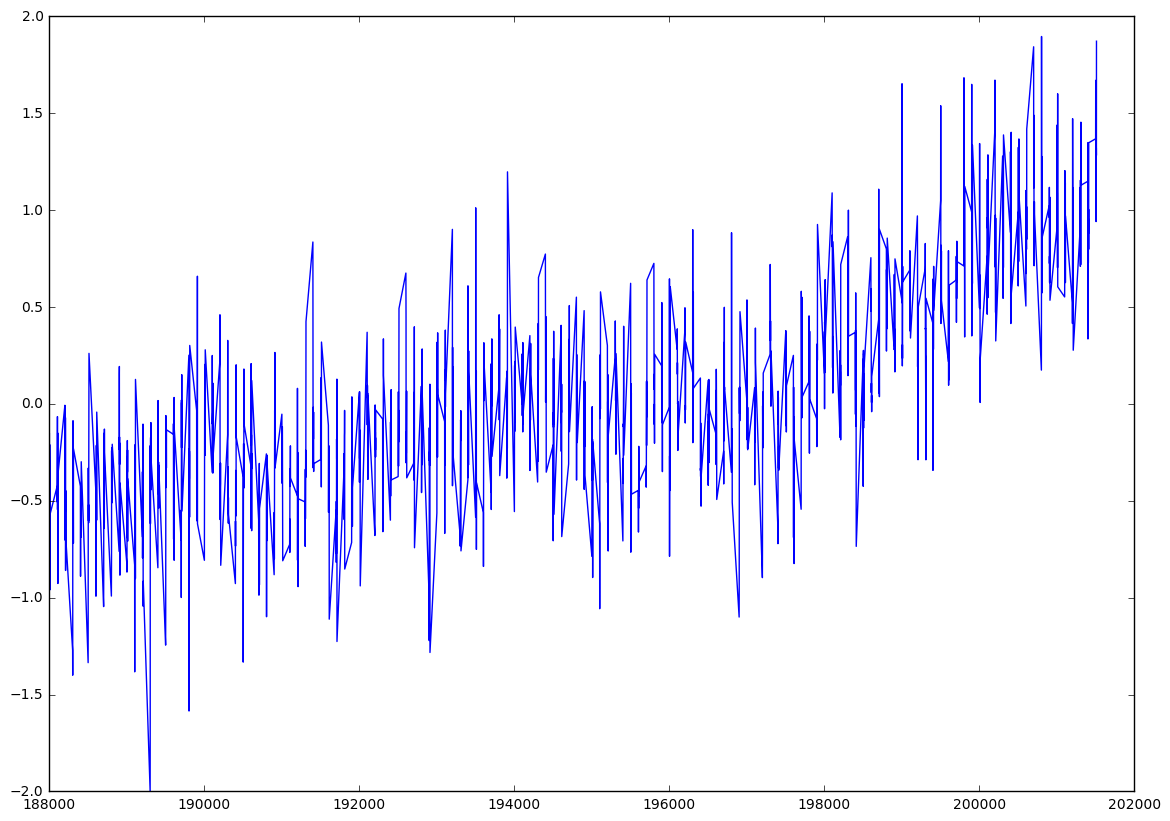

In [19]:
pyplot.figure(figsize = (14,10))
pyplot.plot(Temp_data[:,0],Temp_data[:,1]);

# Using `numpy.arange()` for creating date-array

In [32]:
date = np.arange('1880', '2016', dtype=('datetime64[M]'))
print(date)

['1880-01' '1880-02' '1880-03' ..., '2015-10' '2015-11' '2015-12']


In [41]:
divs = np.linspace(0, len(date), len(date))

In [42]:
pyplot.figure(figsize = (14,10))
# pyplot.plot(divs,Temp_data[:,1]);
len(divs)

1632

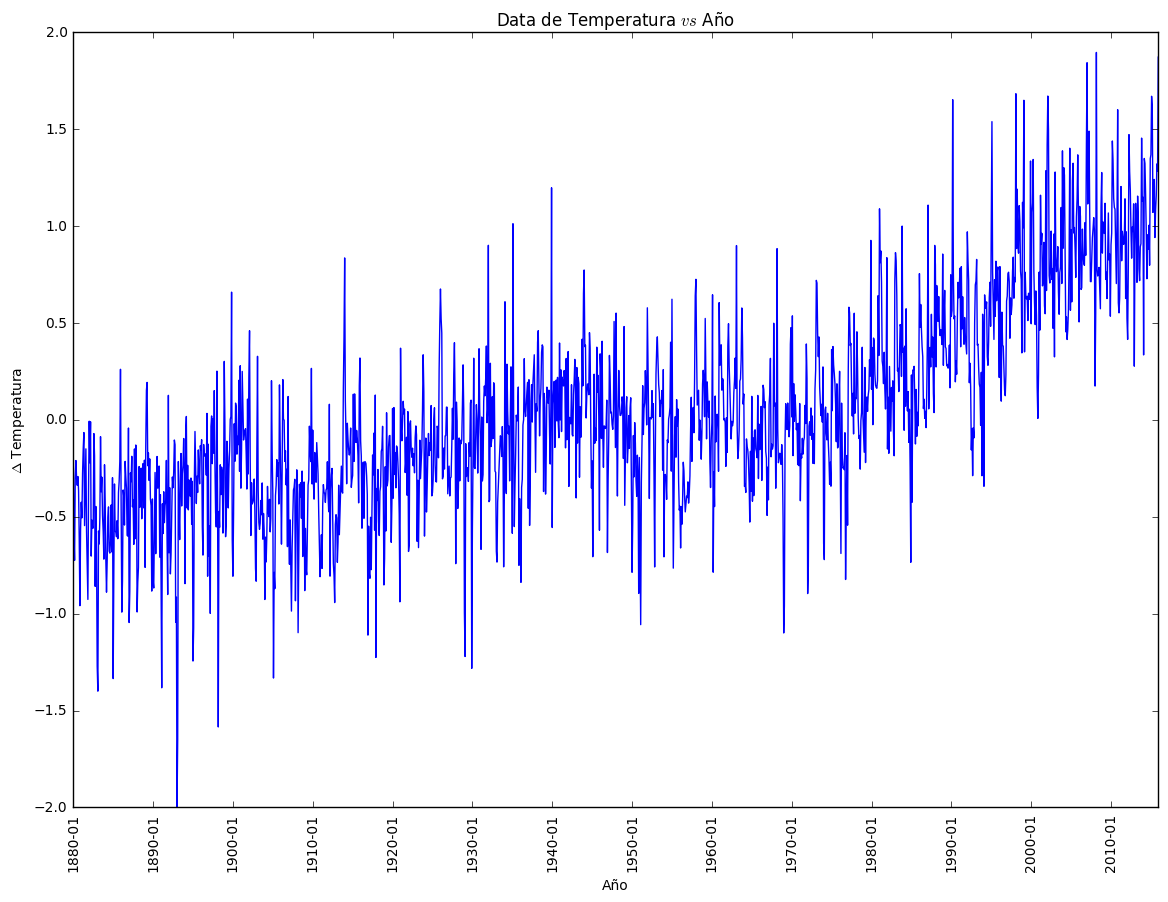

In [50]:
pyplot.figure(figsize = (14,10));
pyplot.xticks(divs[::120], date[::120], rotation = 90);
pyplot.plot(divs,Temp_data[:,1]);
pyplot.title('Data de Temperatura $vs$ Año');
pyplot.xlabel('Año');
pyplot.ylabel('$\Delta$ Temperatura');

In [123]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12

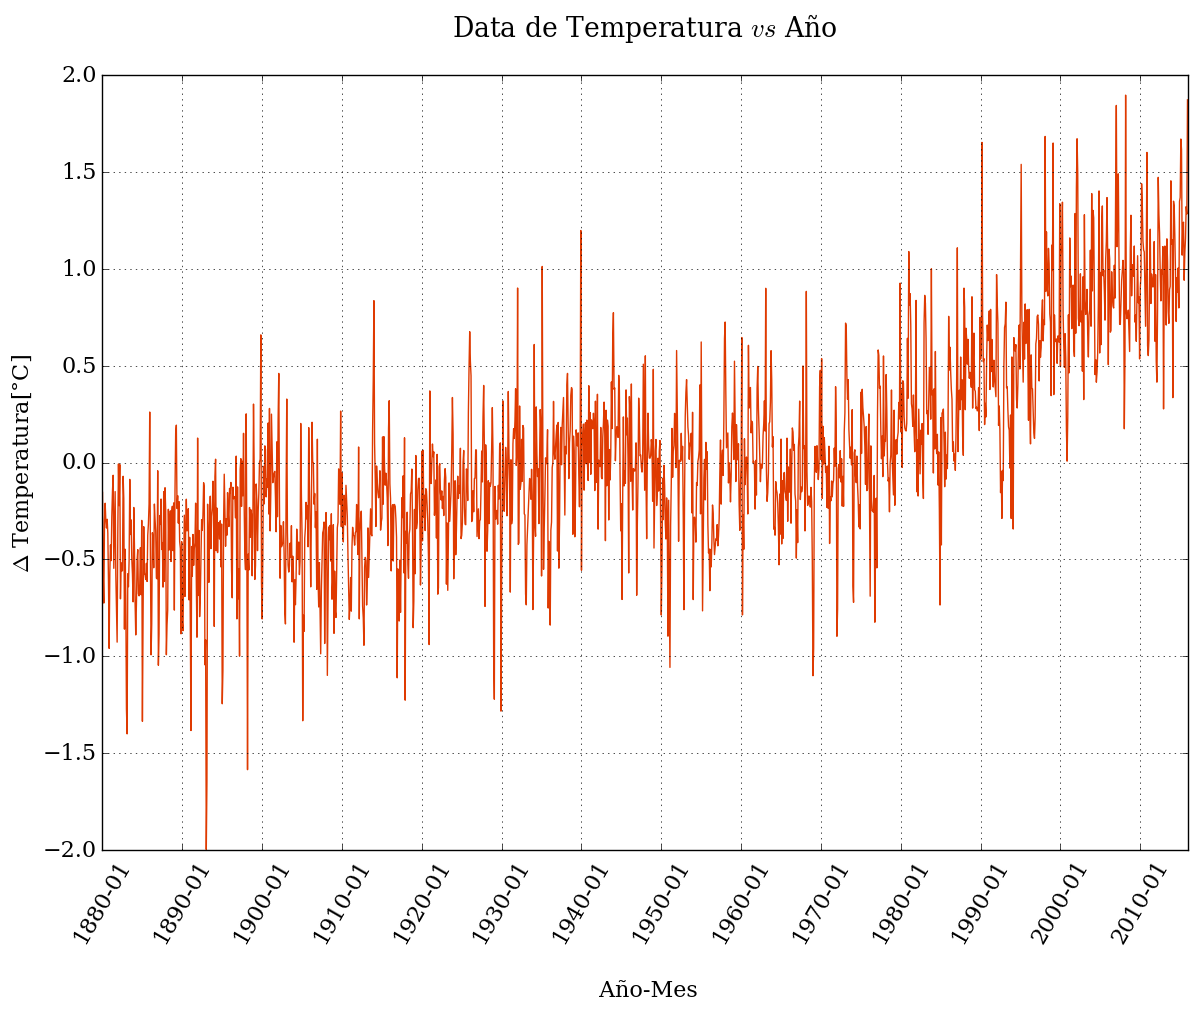

In [82]:
pyplot.figure(figsize = (14,10))
pyplot.xticks(divs[::120], date[::120], rotation = 60)
pyplot.plot(divs, Temp_data[:,1], color='#DF3A01', ls='-', lw = 1)
pyplot.title('Data de Temperatura $vs$ Año \n')
pyplot.xlabel('\n Año-Mes')
pyplot.ylabel('$\Delta$ Temperatura[°C]')
pyplot.grid();
# pyplot.savefig('temp_anomaly.pdf');

# Histograms

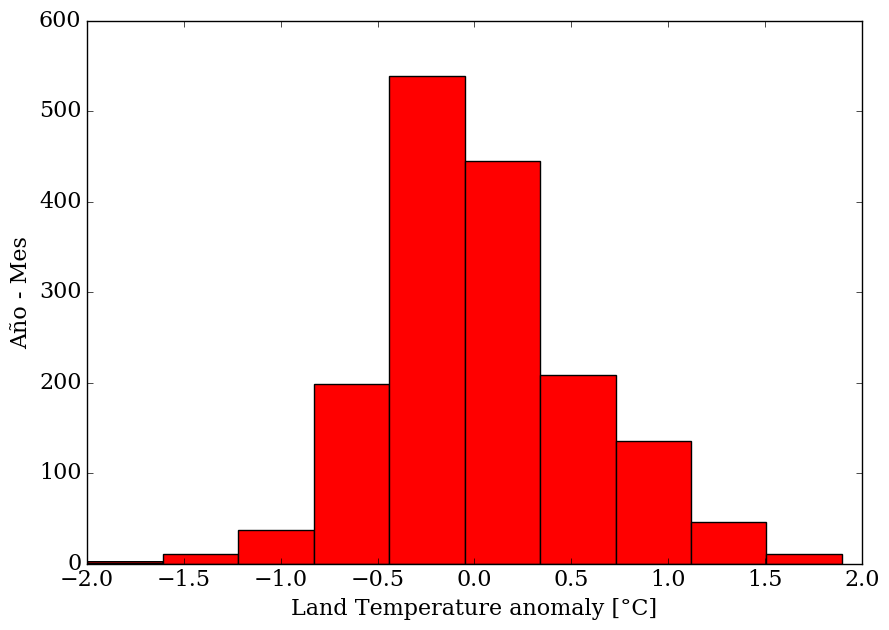

In [88]:
pyplot.figure(figsize = (10, 7))
pyplot.hist(Temp_data[:,1], color = 'r')
pyplot.xlabel('Land Temperature anomaly [°C]')
pyplot.ylabel('Año - Mes');

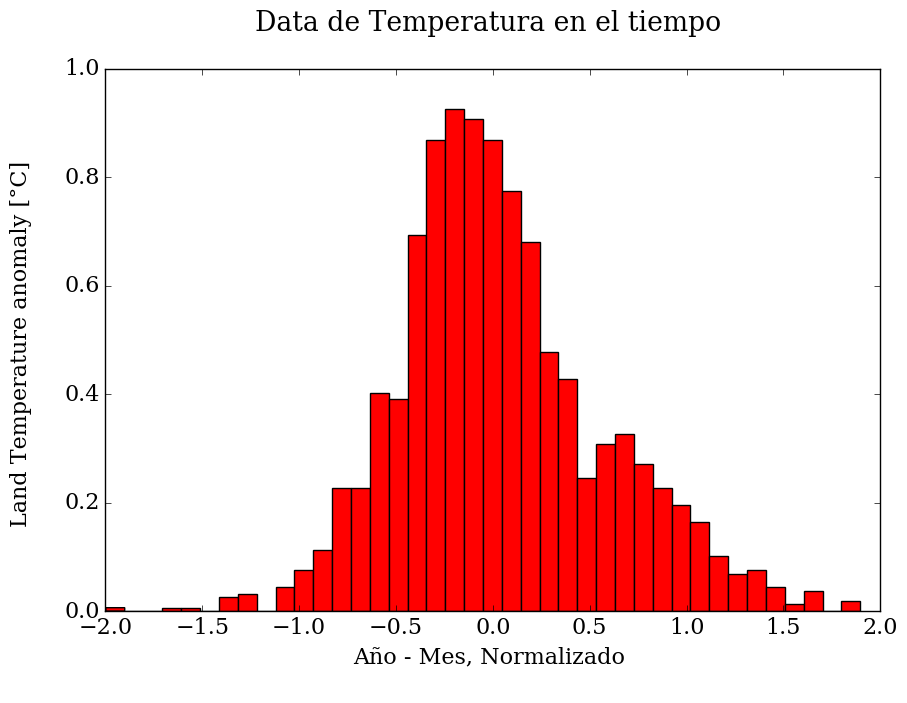

In [99]:
pyplot.figure(figsize = (10, 7))
pyplot.hist(Temp_data[:,1], bins=40, normed=True, color = 'r')
pyplot.title('Data de Temperatura en el tiempo \n')
pyplot.ylabel('Land Temperature anomaly [°C] \n')
pyplot.xlabel('Año - Mes, Normalizado \n');

# Lets do some stats

In [106]:
mean_T = np.mean(Temp_data[:,1])
median_T = np.median(Temp_data[:,1])

print('The mean is {:.5} and the median is {:.5}'.format(mean_T, median_T))

The mean is 0.04031 and the median is -0.0276


In [114]:
variant_T = np.var(Temp_data[:,1])
sigma_T = np.sqrt(variant_T)
print('The variant of the Temp. anomaly is {:.5} and the sigma is {:.5}' .format(variant_T, sigma_T))

The variant of the Temp. anomaly is 0.28041 and the sigma is 0.52954


In [111]:
from scipy import stats

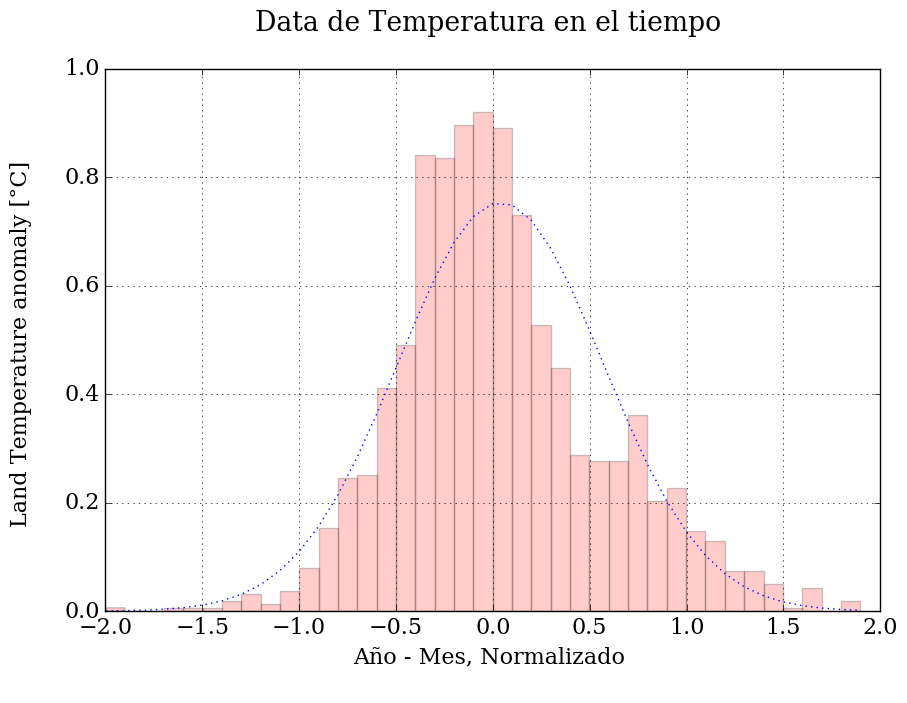

In [119]:
bins = np.linspace(min(Temp_data[:,1]), max(Temp_data[:,1]), 40)
pyplot.figure(figsize = (10, 7))
pyplot.hist(Temp_data[:,1], bins, normed=True, color = 'r', alpha=0.2)

pyplot.plot(bins, stats.norm.pdf(bins, mean_T, sigma_T), ls = ':')
pyplot.title('Data de Temperatura en el tiempo \n')
pyplot.ylabel('Land Temperature anomaly [°C] \n')
pyplot.xlabel('Año - Mes, Normalizado \n')
pyplot.grid();

# Two plots in the same fig.

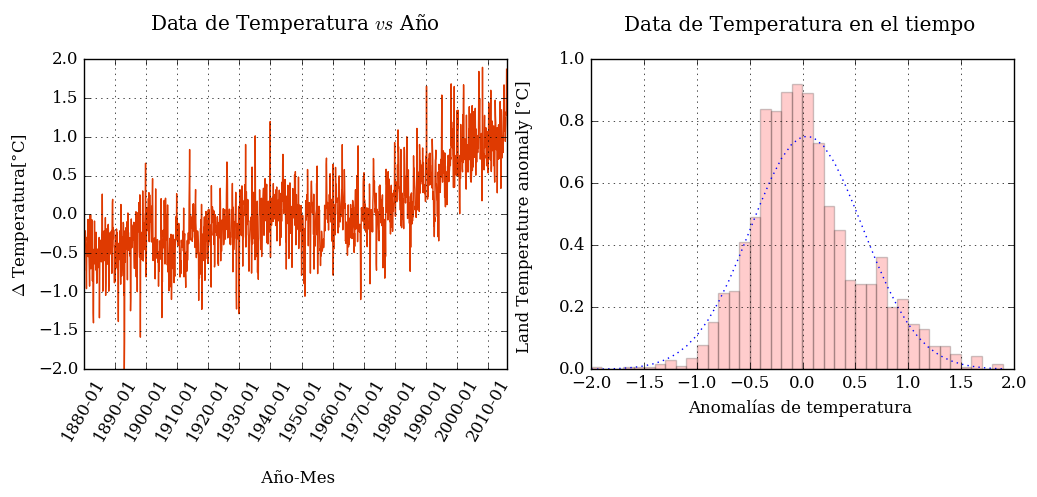

In [127]:
pyplot.figure(figsize=(12,4))

pyplot.subplot(121) # Create a grid of 1 row, 2 columns and select the first one

# first column
pyplot.xticks(divs[::120], date[::120], rotation = 60)
pyplot.plot(divs, Temp_data[:,1], color='#DF3A01', ls='-', lw = 1)
pyplot.title('Data de Temperatura $vs$ Año \n')
pyplot.xlabel('\n Año-Mes')
pyplot.ylabel('$\Delta$ Temperatura[°C]')
pyplot.grid()
# pyplot.savefig('temp_anomaly.pdf');

#second column
pyplot.subplot(122)
bins = np.linspace(min(Temp_data[:,1]), max(Temp_data[:,1]), 40)
pyplot.hist(Temp_data[:,1], bins, normed=True, color = 'r', alpha=0.2)

pyplot.plot(bins, stats.norm.pdf(bins, mean_T, sigma_T), ls = ':')
pyplot.title('Data de Temperatura en el tiempo \n')
pyplot.ylabel('Land Temperature anomaly [°C] \n')
pyplot.xlabel('Anomalías de temperatura \n')
pyplot.grid();

# Smooth the data

In [128]:
def data_smoothing_function(N, data):
    """
    Returns smoothed data using a sliding_moving acarage.
    
    Arguments:
    -------------
    N (int)       : amount of data values we want to average
    data (array)  : array of data we want to smooth
    
    Returns:
    -------------
    smooth (array): array with smoothed data.
    
    """
    
    window = np.ones(N)/N
    smooth = np.convolve(data, window, 'same')
    
    return smooth

In [132]:
smooth = data_smoothing_function(12, Temp_data[:,1])
smooth

array([-0.18874167, -0.21688333, -0.24125833, ...,  0.93280833,
        0.843575  ,  0.7415    ])

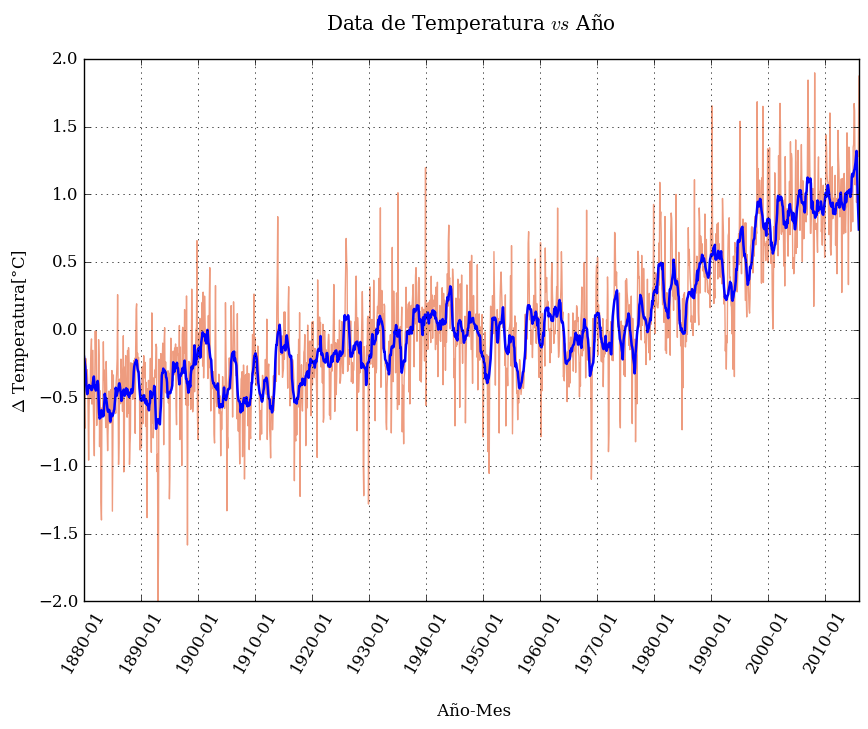

In [139]:
pyplot.figure(figsize=(10,7))

pyplot.xticks(divs[::120], date[::120], rotation = 60)
pyplot.plot(divs, Temp_data[:,1], color='#DF3A01', ls='-', lw = 1, alpha = 0.5)
pyplot.plot(divs, smooth, color='b', ls='-', lw = 1.8)
pyplot.title('Data de Temperatura $vs$ Año \n')
pyplot.xlabel('\n Año-Mes')
pyplot.ylabel('$\Delta$ Temperatura[°C]')
pyplot.grid();